# Begining exploration of the data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from cleaning.clean_func import *
from pipe.fitting_models import *

from sklearn import preprocessing



### Features
- id: only for test & sample submission files, id for prediction sample identification
- price: price in USD
- carat: weight of the diamond
- cut: quality of the cut (Fair, Good, Very Good, Premium, Ideal)
- color: diamond colour, from J (worst) to D (best)
- clarity: a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))
- x: length in mm
- y: width in mm
- z: depth in mm
- depth: total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)
- table: width of top of diamond relative to widest point (43--95)

In [2]:
diamonds = pd.read_csv("train.csv",index_col="id")
diamonds.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
id,,,,,,,,,,
0,0.50,Ideal,D,VS2,62.3,55.0,5.11,5.07,3.17,1845
1,1.54,Good,I,VS1,63.6,60.0,7.30,7.33,4.65,10164
2,1.32,Very Good,J,SI2,61.7,60.0,6.95,7.01,4.31,5513
3,1.20,Ideal,I,SI1,62.1,55.0,6.83,6.79,4.23,5174
4,1.73,Premium,I,SI1,61.2,60.0,7.67,7.65,4.69,10957


Importing ML models

In [3]:
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import ElasticNet

1st MODEL

In [4]:
y=y_processing(diamonds["price"])
X_raw=cleaning_1(diamonds.drop(columns=["price"]))
scaler = preprocessing.StandardScaler().fit(X_raw.values)
X=scaler.transform(X_raw)

In [9]:
sel_func,rmse_1 = best_func(X,y)
sel_func.fit(X,y)

LinearRegression
RMSE (test) = 1002.7527392109839
Choosen one best 1002.7527392109839 1000000 True
KNN
Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed:  9.5min finished


RMSE (test) = 652.7200024388085
Choosen one best 652.7200024388085 1002.7527392109839 True
Forest
Fitting 5 folds for each of 336 candidates, totalling 1680 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1680 out of 1680 | elapsed: 11.8min finished


RMSE (test) = 721.2007310622586


KNeighborsRegressor(weights='distance')

In [10]:
print(rmse_1)
print(sel_func)

652.7200024388085
KNeighborsRegressor(weights='distance')


In [11]:
from sklearn.metrics import r2_score,mean_squared_error
y_pred=sel_func.predict(X)
rmse = mean_squared_error(10**y.values, 10**y_pred, squared=False)
print("RMSE (test) =",rmse)

RMSE (test) = 14.457395849648082


In [12]:
diamonds_test= pd.read_csv("predict.csv",index_col="id")
Xf_raw=cleaning_1(diamonds_test)
Xf=scaler.transform(Xf_raw.values)
y_prediction = 10**sel_func.predict(Xf)
diamonds_test["price"]=y_prediction
diamonds_test["price"].to_csv("res/grid_1_pred.csv")

2nd MODEL

In [13]:
y=y_processing(diamonds["price"])
X_raw=cleaning_2(diamonds.drop(columns=["price"]))
scaler2 = preprocessing.StandardScaler().fit(X_raw.values)
X=scaler2.transform(X_raw)

/home/ordovas/IRONHACK/mini-projects/kaggle-competition/cleaning/clean_func.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diamonds["color"]=diamonds["color"].replace(color)
/home/ordovas/IRONHACK/mini-projects/kaggle-competition/cleaning/clean_func.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diamonds["cut"]=diamonds["cut"].replace(cut)
/home/ordovas/IRONHACK/mini-projects/kaggle-competition/cleaning/clean_func.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

In [14]:
#(min_samples_leaf=5, min_samples_split=5, n_estimators=50, n_jobs=-1)

In [15]:
sel_func2,rmse_2 = best_func(X,y)
sel_func2.fit(X,y)


LinearRegression
RMSE (test) = 6193.006723698375
Choosen one best 6193.006723698375 1000000 True
KNN
Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed:   53.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


RMSE (test) = 651.1109536693785
Choosen one best 651.1109536693785 6193.006723698375 True
Forest
Fitting 5 folds for each of 336 candidates, totalling 1680 fits


[Parallel(n_jobs=1)]: Done 1680 out of 1680 | elapsed:  7.1min finished


RMSE (test) = 571.3367727564453
Choosen one best 571.3367727564453 651.1109536693785 True


RandomForestRegressor(min_samples_leaf=5, min_samples_split=5, n_jobs=-1)

In [16]:
print(rmse_2)
print(sel_func2)

571.3367727564453
RandomForestRegressor(min_samples_leaf=5, min_samples_split=5, n_jobs=-1)


In [17]:
diamonds_test= pd.read_csv("predict.csv",index_col="id")
Xf_raw=cleaning_2(diamonds_test)
Xf=scaler2.transform(Xf_raw.values)
y_prediction = 10**sel_func2.predict(Xf)
diamonds_test["price"]=y_prediction
diamonds_test["price"].to_csv("res/grid_2_pred.csv")


/home/ordovas/IRONHACK/mini-projects/kaggle-competition/cleaning/clean_func.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diamonds["color"]=diamonds["color"].replace(color)
/home/ordovas/IRONHACK/mini-projects/kaggle-competition/cleaning/clean_func.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diamonds["cut"]=diamonds["cut"].replace(cut)
/home/ordovas/IRONHACK/mini-projects/kaggle-competition/cleaning/clean_func.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

3rd MODEL

In [18]:
y=y_processing(diamonds["price"])
X_raw=cleaning_3(diamonds.drop(columns=["price"]))
scaler3 = preprocessing.StandardScaler().fit(X_raw.values)
X=scaler3.transform(X_raw)

In [19]:
sel_func3,rmse_3 = best_func(X,y)
sel_func3.fit(X,y)


LinearRegression
RMSE (test) = 5610.2217587438945
Choosen one best 5610.2217587438945 1000000 True
KNN
Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed:  7.8min finished


RMSE (test) = 692.7519036665183
Choosen one best 692.7519036665183 5610.2217587438945 True
Forest
Fitting 5 folds for each of 336 candidates, totalling 1680 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1680 out of 1680 | elapsed:  6.5min finished


RMSE (test) = 661.788541347771
Choosen one best 661.788541347771 692.7519036665183 True


RandomForestRegressor(min_samples_leaf=5, min_samples_split=5, n_estimators=75,
                      n_jobs=-1)

In [20]:
print(rmse_3)
print(sel_func3)

661.788541347771
RandomForestRegressor(min_samples_leaf=5, min_samples_split=5, n_estimators=75,
                      n_jobs=-1)


In [21]:
diamonds_test= pd.read_csv("predict.csv",index_col="id")
Xf_raw=cleaning_3(diamonds_test)
Xf=scaler3.transform(Xf_raw.values)
y_prediction = 10**sel_func3.predict(Xf)
diamonds_test["price"]=y_prediction
diamonds_test["price"].to_csv("res/grid_3_pred.csv")

4th MODEL

In [22]:
y=y_processing(diamonds["price"])
X_raw=cleaning_4(diamonds.drop(columns=["price"]))
scaler4 = preprocessing.StandardScaler().fit(X_raw.values)
X=scaler4.transform(X_raw)

/home/ordovas/IRONHACK/mini-projects/kaggle-competition/cleaning/clean_func.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diamonds["color"]=diamonds["color"].replace(color)
/home/ordovas/IRONHACK/mini-projects/kaggle-competition/cleaning/clean_func.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diamonds["cut"]=diamonds["cut"].replace(cut)
/home/ordovas/IRONHACK/mini-projects/kaggle-competition/cleaning/clean_func.py:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

In [23]:
sel_func4,rmse_4 = best_func(X,y)
sel_func4.fit(X,y)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


LinearRegression
RMSE (test) = 28155.65257380409
Choosen one best 28155.65257380409 1000000 True
KNN
Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed:   35.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


RMSE (test) = 669.5573221592437
Choosen one best 669.5573221592437 28155.65257380409 True
Forest
Fitting 5 folds for each of 336 candidates, totalling 1680 fits


[Parallel(n_jobs=1)]: Done 1680 out of 1680 | elapsed:  3.6min finished


RMSE (test) = 562.4066484968095
Choosen one best 562.4066484968095 669.5573221592437 True


RandomForestRegressor(min_samples_leaf=5, min_samples_split=5, n_estimators=75,
                      n_jobs=-1)

In [24]:
print(rmse_4)
print(sel_func4)

562.4066484968095
RandomForestRegressor(min_samples_leaf=5, min_samples_split=5, n_estimators=75,
                      n_jobs=-1)


In [25]:
diamonds_test= pd.read_csv("predict.csv",index_col="id")
Xf_raw=cleaning_4(diamonds_test)
Xf=scaler4.transform(Xf_raw.values)
y_prediction = 10**sel_func4.predict(Xf)
diamonds_test["price"]=y_prediction
diamonds_test["price"].to_csv("res/grid_4_pred.csv")

/home/ordovas/IRONHACK/mini-projects/kaggle-competition/cleaning/clean_func.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diamonds["color"]=diamonds["color"].replace(color)
/home/ordovas/IRONHACK/mini-projects/kaggle-competition/cleaning/clean_func.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diamonds["cut"]=diamonds["cut"].replace(cut)
/home/ordovas/IRONHACK/mini-projects/kaggle-competition/cleaning/clean_func.py:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

5th MODEL

In [26]:
y=y_processing(diamonds["price"])
X_raw=cleaning_5(diamonds.drop(columns=["price"]))
scaler5 = preprocessing.StandardScaler().fit(X_raw.values)
X=scaler5.transform(X_raw)

In [27]:
sel_func5,rmse_5 = best_func(X,y)
sel_func5.fit(X,y)

LinearRegression
RMSE (test) = 1551.9736968689926
Choosen one best 1551.9736968689926 1000000 True
KNN
Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed:  8.3min finished


RMSE (test) = 680.2852679663085
Choosen one best 680.2852679663085 1551.9736968689926 True
Forest
Fitting 5 folds for each of 336 candidates, totalling 1680 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1680 out of 1680 | elapsed:  7.2min finished


RMSE (test) = 705.3429143862282


KNeighborsRegressor(weights='distance')

In [28]:
print(rmse_5)
print(sel_func5)

680.2852679663085
KNeighborsRegressor(weights='distance')


In [29]:
diamonds_test= pd.read_csv("predict.csv",index_col="id")
Xf_raw=cleaning_5(diamonds_test)
Xf=scaler5.transform(Xf_raw.values)
y_prediction = 10**sel_func5.predict(Xf)
diamonds_test["price"]=y_prediction
diamonds_test["price"].to_csv("res/grid_5_pred.csv")

6th MODEL

In [30]:
y=y_processing(diamonds["price"])
X_raw=cleaning_6(diamonds.drop(columns=["price"]))
scaler6 = preprocessing.StandardScaler().fit(X_raw.values)
X=scaler6.transform(X_raw)

/home/ordovas/IRONHACK/mini-projects/kaggle-competition/cleaning/clean_func.py:89: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diamonds["color"]=diamonds["color"].replace(color)
/home/ordovas/IRONHACK/mini-projects/kaggle-competition/cleaning/clean_func.py:90: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diamonds["cut"]=diamonds["cut"].replace(cut)
/home/ordovas/IRONHACK/mini-projects/kaggle-competition/cleaning/clean_func.py:91: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

In [31]:
sel_func6,rmse_6 = best_func(X,y)
sel_func6.fit(X,y)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


LinearRegression
RMSE (test) = 1937.121084567295
Choosen one best 1937.121084567295 1000000 True
KNN
Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed:   54.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


RMSE (test) = 820.450643166402
Choosen one best 820.450643166402 1937.121084567295 True
Forest
Fitting 5 folds for each of 336 candidates, totalling 1680 fits


[Parallel(n_jobs=1)]: Done 1680 out of 1680 | elapsed:  7.4min finished


RMSE (test) = 673.9502776468439
Choosen one best 673.9502776468439 820.450643166402 True


RandomForestRegressor(min_samples_leaf=5, min_samples_split=25, n_jobs=-1)

In [32]:
print(rmse_6)
print(sel_func6)

673.9502776468439
RandomForestRegressor(min_samples_leaf=5, min_samples_split=25, n_jobs=-1)


In [33]:
diamonds_test= pd.read_csv("predict.csv",index_col="id")
Xf_raw=cleaning_6(diamonds_test)
Xf=scaler6.transform(Xf_raw.values)
y_prediction = 10**sel_func6.predict(Xf)
diamonds_test["price"]=y_prediction
diamonds_test["price"].to_csv("res/grid_6_pred.csv")

/home/ordovas/IRONHACK/mini-projects/kaggle-competition/cleaning/clean_func.py:89: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diamonds["color"]=diamonds["color"].replace(color)
/home/ordovas/IRONHACK/mini-projects/kaggle-competition/cleaning/clean_func.py:90: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diamonds["cut"]=diamonds["cut"].replace(cut)
/home/ordovas/IRONHACK/mini-projects/kaggle-competition/cleaning/clean_func.py:91: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

7th MODEL

In [94]:
from cleaning.clean_func import cleaning_7

y=y_processing(diamonds["price"])
X_raw=cleaning_7(diamonds.drop(columns=["price"]))
scaler7 = preprocessing.StandardScaler().fit(X_raw.values)
X=scaler7.transform(X_raw)

In [5]:
sel_func7,rmse_7 = best_func(X,y)
sel_func7.fit(X,y)

LinearRegression
RMSE (test) = 5797.372723710179
Choosen one best 5797.372723710179 1000000 True
KNN
Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed:  2.3min finished


RMSE (test) = 704.1593339923847
Choosen one best 704.1593339923847 5797.372723710179 True
Forest
Fitting 5 folds for each of 336 candidates, totalling 1680 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1680 out of 1680 | elapsed:  6.4min finished


RMSE (test) = 543.604606674903
Choosen one best 543.604606674903 704.1593339923847 True


RandomForestRegressor(min_samples_leaf=5, min_samples_split=5, n_jobs=-1)

In [6]:
print(rmse_7)
print(sel_func7)

543.604606674903
RandomForestRegressor(min_samples_leaf=5, min_samples_split=5, n_jobs=-1)


In [7]:
diamonds_test= pd.read_csv("predict.csv",index_col="id")
Xf_raw=cleaning_7(diamonds_test)
Xf=scaler7.transform(Xf_raw.values)
y_prediction = 10**sel_func7.predict(Xf)
diamonds_test["price"]=y_prediction
diamonds_test["price"].to_csv("res/grid_7_pred.csv")

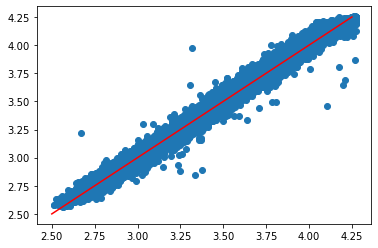

In [49]:
plt.scatter(y,sel_func7.predict(X))
plt.plot([2.5,4.25],[2.5,4.25],color="red")

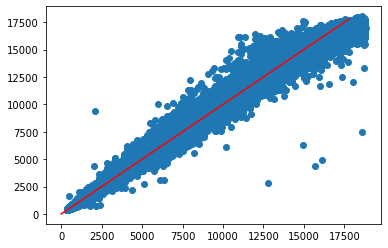

In [46]:
plt.scatter(10**y,10**sel_func7.predict(X))
plt.plot([0,17800],[0,17800],color="red")

In [70]:
rmse = mean_squared_error(10**y[3.8<y], 10**sel_func7.predict(X)[3.8<y], squared=False)
print("RMSE (test) =",rmse)
rmse = mean_squared_error(10**y[y<3.8], 10**sel_func7.predict(X)[y<3.8], squared=False)
print("RMSE (test) =",rmse)

RMSE (test) = 898.3855961904379
RMSE (test) = 219.85899545527053


In [76]:
rmse = mean_squared_error(10**y[4<y], 10**sel_func7.predict(X)[4<y], squared=False)
print("RMSE (test) =",rmse)
rmse = mean_squared_error(10**y[y<4], 10**sel_func7.predict(X)[y<4], squared=False)
print("RMSE (test) =",rmse)

RMSE (test) = 1116.8115677235785
RMSE (test) = 296.1324764743617


In [95]:
sum((y-sel_func7.predict(X))**2)

42.44855844956533

8th MODEL

In [5]:

y=y_processing(diamonds["price"])
X_raw=cleaning_8(diamonds.drop(columns=["price"]))
scaler8 = preprocessing.StandardScaler().fit(X_raw.values)
X=scaler8.transform(X_raw)

In [6]:
sel_func8,rmse_8 = best_func(X,y)
sel_func8.fit(X,y)

LinearRegression
RMSE (test) = 1015.581112283209
Choosen one best 1015.581112283209 1000000 True
KNN
Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed:  9.2min finished


RMSE (test) = 735.7571126804845
Choosen one best 735.7571126804845 1015.581112283209 True
Forest
Fitting 5 folds for each of 336 candidates, totalling 1680 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1680 out of 1680 | elapsed: 20.1min finished


RMSE (test) = 581.8298074127849
Choosen one best 581.8298074127849 735.7571126804845 True


RandomForestRegressor(min_samples_leaf=5, min_samples_split=5, n_jobs=-1)

In [7]:
print(rmse_8)
print(sel_func8)

581.8298074127849
RandomForestRegressor(min_samples_leaf=5, min_samples_split=5, n_jobs=-1)


In [8]:
diamonds_test= pd.read_csv("predict.csv",index_col="id")
Xf_raw=cleaning_8(diamonds_test)
Xf=scaler8.transform(Xf_raw.values)
y_prediction = 10**sel_func8.predict(Xf)
diamonds_test["price"]=y_prediction
diamonds_test["price"].to_csv("res/grid_8_pred.csv")

### Testing dividing in 2 samples

In [68]:


y=y_processing(diamonds["price"])
X_raw=cleaning_8(diamonds.drop(columns=["price"]))
scaler_2parts = preprocessing.StandardScaler().fit(X_raw.values)
X_raw1=cleaning_8(diamonds[6.75<diamonds["x"]].drop(columns=["price"]))
X_raw2=cleaning_8(diamonds[diamonds["x"]<6.75].drop(columns=["price"]))
X1=scaler_2parts.transform(X_raw1)
X2=scaler_2parts.transform(X_raw2)

In [69]:
sel_func_2parts_1,rmse__2parts_1 = best_func(X1,y[6.75<diamonds["x"]])
#sel_func_2parts_1.fit(X1,y[6.75<diamonds["x"]])

LinearRegression
RMSE (test) = 2.442568270133245e+26
KNN
Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


RMSE (test) = 1457.464515614
Choosen one best 1457.464515614 1000000 True
Forest
Fitting 5 folds for each of 336 candidates, totalling 1680 fits


[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed:  1.0min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1680 out of 1680 | elapsed:  8.1min finished


RMSE (test) = 1130.1663877506726
Choosen one best 1130.1663877506726 1457.464515614 True


In [70]:
sel_func_2parts_2,rmse__2parts_2 = best_func(X2,y[diamonds["x"]<6.75])
#sel_func_2parts_2.fit(X2,y[diamonds["x"]<6.75])

LinearRegression
RMSE (test) = 516.1122396877047
Choosen one best 516.1122396877047 1000000 True
KNN
Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed:  6.7min finished


RMSE (test) = 414.97039173371763
Choosen one best 414.97039173371763 516.1122396877047 True
Forest
Fitting 5 folds for each of 336 candidates, totalling 1680 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1680 out of 1680 | elapsed: 15.8min finished


RMSE (test) = 322.39832060242776
Choosen one best 322.39832060242776 414.97039173371763 True


In [71]:
print(rmse__2parts_1,)
print(sel_func_2parts_1)
print(rmse__2parts_2)
print(sel_func_2parts_2)
print(np.sqrt(  (rmse__2parts_1*rmse__2parts_1*len(y[6.75<diamonds["x"]])/len(y))
      +(rmse__2parts_2*rmse__2parts_2*len(y[diamonds["x"]<6.75])/len(y)) )  )

1130.1663877506726
RandomForestRegressor(max_features='log2', min_samples_leaf=5,
                      min_samples_split=5, n_jobs=-1)
322.39832060242776
RandomForestRegressor(min_samples_leaf=5, min_samples_split=5, n_jobs=-1)
569.4520991194843


In [72]:
331690.98726881**0.5

575.9261994985208

In [73]:
yp=y.copy()
yp[6.75<diamonds["x"]]=sel_func_2parts_1.predict(X1)
yp[diamonds["x"]<6.75]=sel_func_2parts_2.predict(X2)
rmse = mean_squared_error(10**y, 10**yp, squared=False)
print("RMSE (test) =",rmse)

RMSE (test) = 467.73047327254767


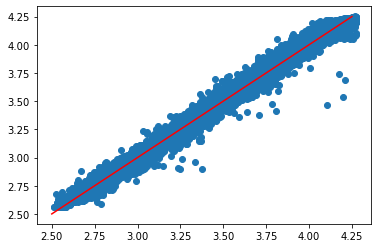

In [74]:
plt.scatter(y,yp)
plt.plot([2.5,4.25],[2.5,4.25],color="red")

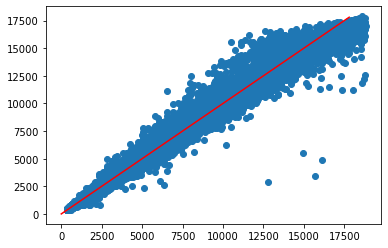

In [75]:
#plt.scatter(diamonds["x"],np.log10(diamonds["price"]))
plt.scatter(10**y,10**yp)
plt.plot([0,17800],[0,17800],color="red")

In [76]:
print(diamonds[6.75<diamonds["x"]].shape)
print(diamonds[diamonds["x"]<6.75].shape)
sum((y-yp)**2)

(7605, 10)
(32758, 10)


42.89810697561005

In [77]:
diamonds_test= pd.read_csv("predict.csv",index_col="id")
X_raw1p=cleaning_8(diamonds_test[6.75<diamonds_test["x"]])
X_raw2p=cleaning_8(diamonds_test[diamonds_test["x"]<6.75])
X1p=scaler_2parts.transform(X_raw1p)
X2p=scaler_2parts.transform(X_raw2p)

yp[6.75<diamonds["x"]]=sel_func_2parts_1.predict(X1)
yp[diamonds["x"]<6.75]=sel_func_2parts_2.predict(X2)

y_prediction = diamonds_test["x"]
y_prediction[6.75<diamonds_test["x"]]= 10**sel_func_2parts_1.predict(X1p)
y_prediction[diamonds_test["x"]<6.75]= 10**sel_func_2parts_2.predict(X2p)

diamonds_test["price"]=y_prediction
diamonds_test["price"].to_csv("res/grid_2part_pred2.csv")

<ipython-input-77-9edb86a9bee0>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_prediction[6.75<diamonds_test["x"]]= 10**sel_func_2parts_1.predict(X1p)
<ipython-input-77-9edb86a9bee0>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_prediction[diamonds_test["x"]<6.75]= 10**sel_func_2parts_2.predict(X2p)


In [78]:
diamonds_test["price"]

id
0        1035.622829
1        6686.665156
2         752.727315
3        1827.579841
4         953.213128
            ...     
13480     415.928165
13481    4335.033166
13482     907.950273
13483     709.627372
13484    4553.955654
Name: price, Length: 13485, dtype: float64